<a href="https://colab.research.google.com/github/anabelcarol/Machine-Learning/blob/master/Projects/PyTorch_Keras/Prediction%20On%20Defaulters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Keras API Project: Prediction Loan Default

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: We will not use the full zip from the link! We will use a special version of this file that has some extra feature engineering.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on __whether or not the borrower defaulted (charge-off)__, can we __build a model that can predict wether or nor a borrower will pay back their loan?__ This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 

__Keep in mind classification metrics when evaluating the performance of your model!__

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [0]:
import pandas as pd

In [0]:
data_info = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DeepLearning_TensorFlow/TensorFlow_FILES/DATA/lending_club_info.csv')

In [0]:
data_info.head(2)

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...


In [0]:
data_info = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DeepLearning_TensorFlow/TensorFlow_FILES/DATA/lending_club_info.csv',index_col='LoanStatNew')

In [0]:
data_info.head(2)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...


In [0]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [0]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [0]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
# %matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DeepLearning_TensorFlow/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Project Tasks
------
# Section 1: Exploratory Data Analysis

OVERALL GOAL: Get an understanding about which variables are important, view summary statistics, and visualize the data
----

_Since we will be attempting to predict loan_status, I create a countplot as shown below_

Text(0.5, 0, 'loan_status')

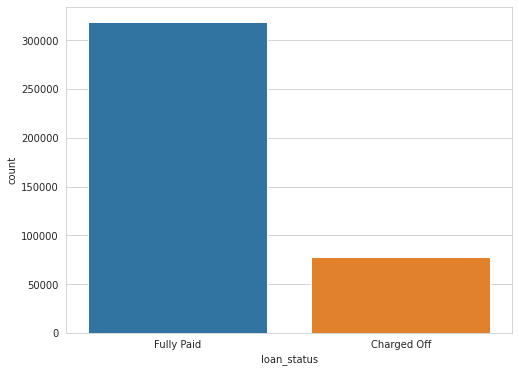

In [0]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

sns.countplot(x='loan_status', data=df)
plt.xlabel('loan_status')

_I replace the values for the column loan_status just because that helps me to plot it againts other features_

In [0]:
df['loan_status'].replace('Fully Paid', 0, inplace=True)

In [0]:
df['loan_status'].replace('Charged Off', 1, inplace=True)

In [0]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,0,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,0,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


_Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method_

In [0]:
df.corr()['loan_status'].sort_values()

mort_acc               -0.073111
annual_inc             -0.053432
total_acc              -0.017893
revol_bal              -0.010892
pub_rec_bankruptcies    0.009383
pub_rec                 0.019933
open_acc                0.028012
installment             0.041082
loan_amnt               0.059836
dti                     0.062413
revol_util              0.082373
int_rate                0.247758
loan_status             1.000000
Name: loan_status, dtype: float64

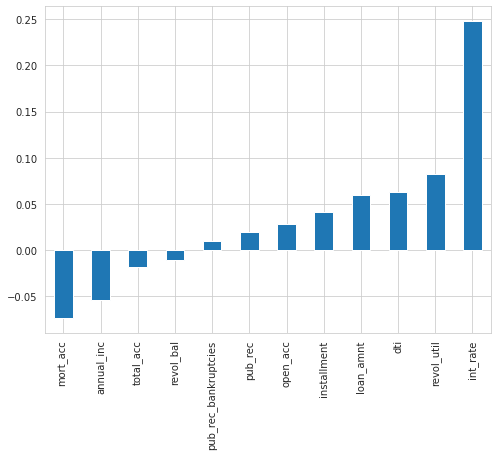

In [0]:
plt.figure(figsize=(8,6))
df.corr()['loan_status'].sort_values()[:-1].plot(kind='bar')

_Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap_

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

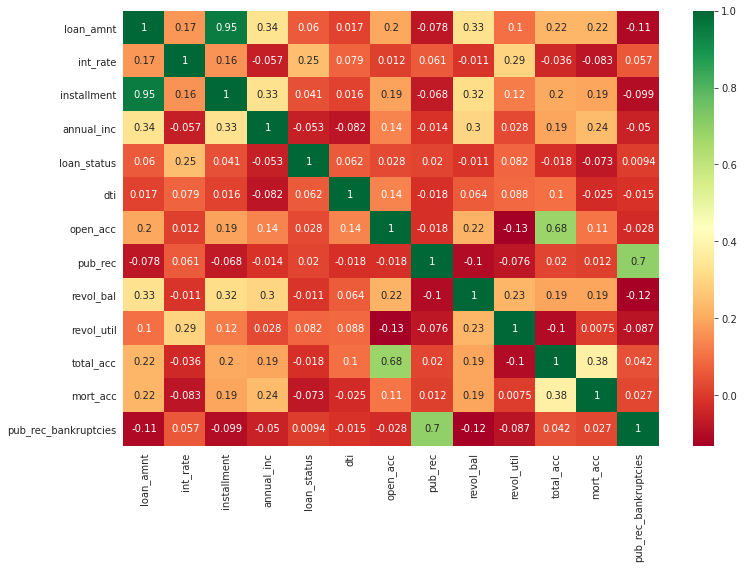

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(), cmap='RdYlGn', annot=True)

_There is a correlation between loan status and interest rate. This is as we expected since "On the Lending Club:_
* borrowers with higher credit scores (more trustworthy and less risky) get lower interest rates for their loans while;
* borrowers with lower credit scores (less trustworthy and more risky) get higher rates".

_Lets know focus on the feature loan_amnt and check its relation within the dataframe. I create a histogram of the loan_amnt column_

Text(0.5, 0, 'loan_amount')

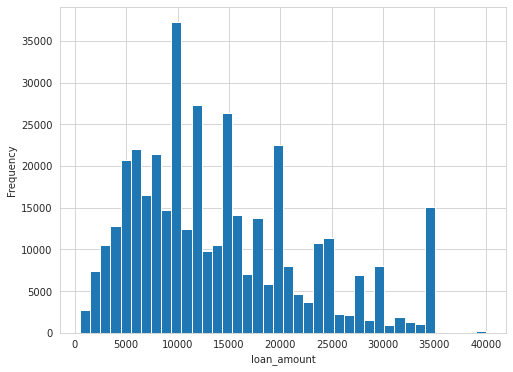

In [0]:
plt.figure(figsize=(8,6))
df['loan_amnt'].plot.hist(bins=40)
plt.xlabel('loan_amount')

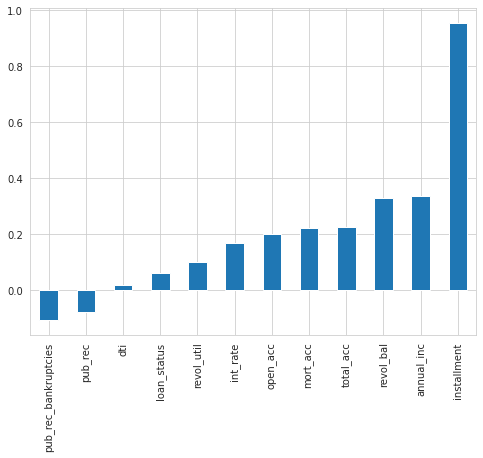

In [0]:
plt.figure(figsize=(8,6))
df.corr()['loan_amnt'].sort_values()[:-1].plot(kind='bar')

_Noticed there is almost perfect correlation with the "installment" feature. Lets explore this feature further. Print out their descriptions_

In [0]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [0]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


_Perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?_

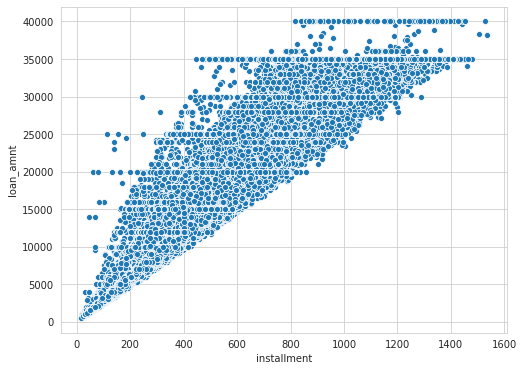

In [0]:
plt.figure(figsize=(8,6))
sns.scatterplot(y = 'loan_amnt', x ='installment' , data = df )

_??? dont know if there is duplicate data_

_Create a boxplot showing the relationship between the loan_status and the Loan Amount._

_lets return to the original dataset with loan status string values_

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DeepLearning_TensorFlow/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

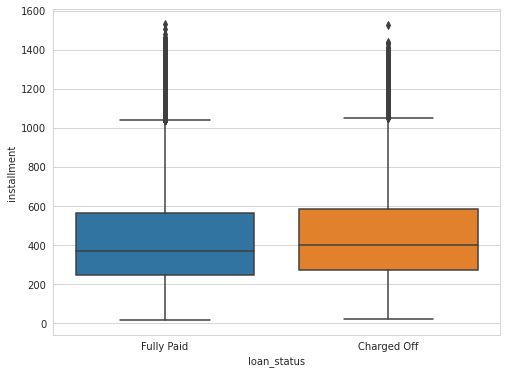

In [0]:
plt.figure(figsize=(8,6))
sns.boxplot(x= 'loan_status', y='installment', data=df)

In [0]:
df.groupby('loan_status')['installment'].describe().transpose()

loan_status,Charged Off,Fully Paid
count,77673.000000,318357.000000
mean,452.703110,426.761866
std,249.096609,250.861622
min,21.620000,16.080000
25%,274.860000,244.460000
50%,399.060000,369.510000
75%,585.670000,562.890000
max,1527.000000,1533.810000


_In overall it seems that good payers have higher range of number of installments._

_Calculate the summary statistics for the loan amount, grouped by the loan_status._

In [0]:
df.groupby('loan_status')['loan_amnt'].describe().transpose()

loan_status,Charged Off,Fully Paid
count,77673.000000,318357.000000
mean,15126.300967,13866.878771
std,8505.090557,8302.319699
min,1000.000000,500.000000
25%,8525.000000,7500.000000
50%,14000.000000,12000.000000
75%,20000.000000,19225.000000
max,40000.000000,40000.000000


_In overall, it seems that good payers have access to even small amount (ex. $500), on the contrary defaulters have less options with respect to loan_amount._

_Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?_

In [0]:
feat_info('grade')

LC assigned loan grade


In [0]:
feat_info('sub_grade')

LC assigned loan subgrade


In [0]:
df.select_dtypes('object').head(2)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [0]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [0]:
df['grade'].nunique()

7

In [0]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [0]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [0]:
df['sub_grade'].nunique()

35

In [0]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

_Lets visualise it! Create a countplot per grade. Set the hue to the loan_status label._

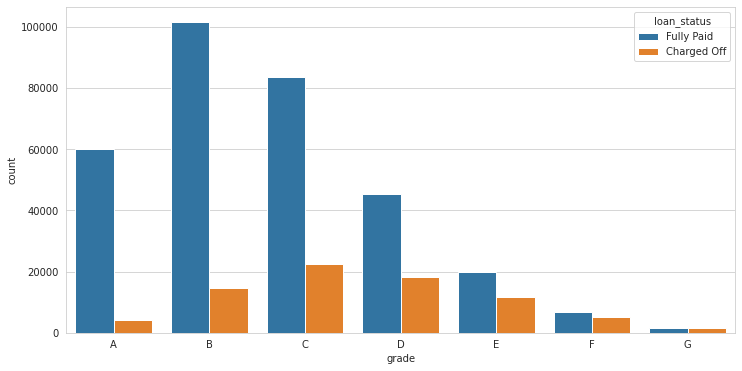

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(df['grade'].sort_values(), hue=df['loan_status'])

_Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"_

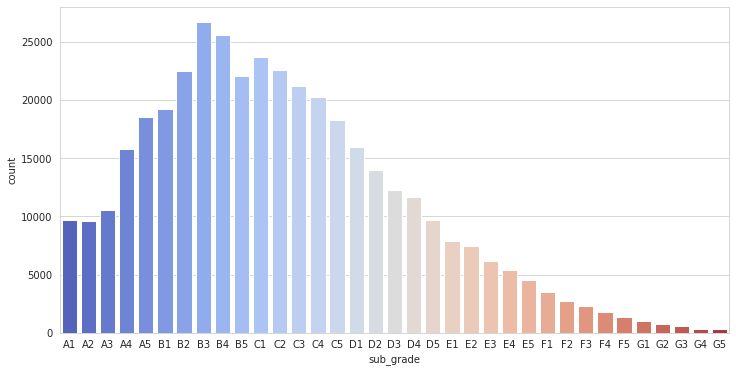

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(df['sub_grade'].sort_values(), palette='coolwarm')

_It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades._

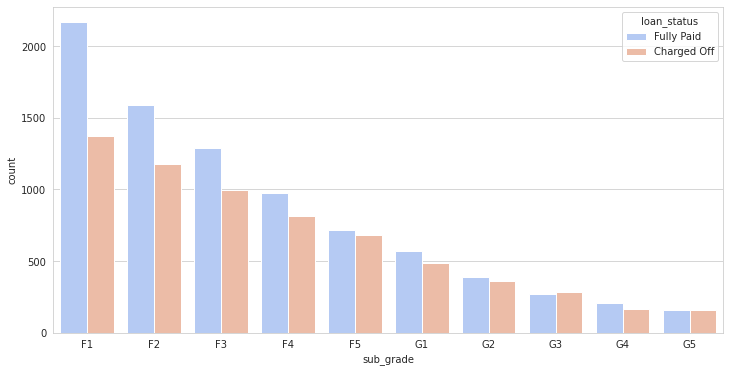

In [0]:
plt.figure(figsize=(12,6))

f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]

subgrade_order = sorted(f_and_g['sub_grade'].unique())

sns.countplot(x='sub_grade', order=subgrade_order , palette='coolwarm', hue='loan_status', data = f_and_g)

In [0]:
# sorted(f_and_g['sub_grade'].unique())

_Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"._

In [0]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

# df['loan_repaid'] = df['loan_status']

In [0]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


_Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)_

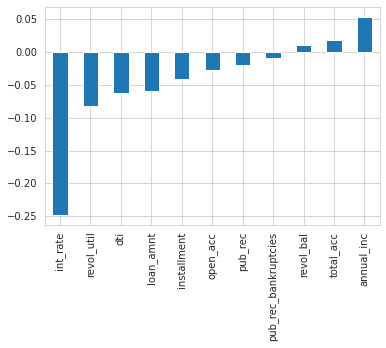

In [0]:
df.corr()['loan_repaid'].sort_values()[:-2].plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [0]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

_What is the length of the dataframe?_



In [0]:
len(df)

396030

_Create a Series that displays the total count of missing values per column._

In [0]:
df.isnull().sum().sort_values()

loan_amnt                   0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
dti                         0
address                     0
loan_status                 0
purpose                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
term                        0
issue_d                     0
loan_repaid                 0
revol_util                276
pub_rec_bankruptcies      535
title                    1755
emp_length              18301
emp_title               22927
mort_acc                37795
dtype: int64

_Convert this Series to be in term of percentage of the total DataFrame_

In [0]:
((df.isnull().sum()/len(df))*100).sort_values()

loan_amnt               0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
dti                     0.000000
address                 0.000000
loan_status             0.000000
purpose                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
issue_d                 0.000000
loan_repaid             0.000000
revol_util              0.069692
pub_rec_bankruptcies    0.135091
title                   0.443148
emp_length              4.621115
emp_title               5.789208
mort_acc                9.543469
dtype: float64

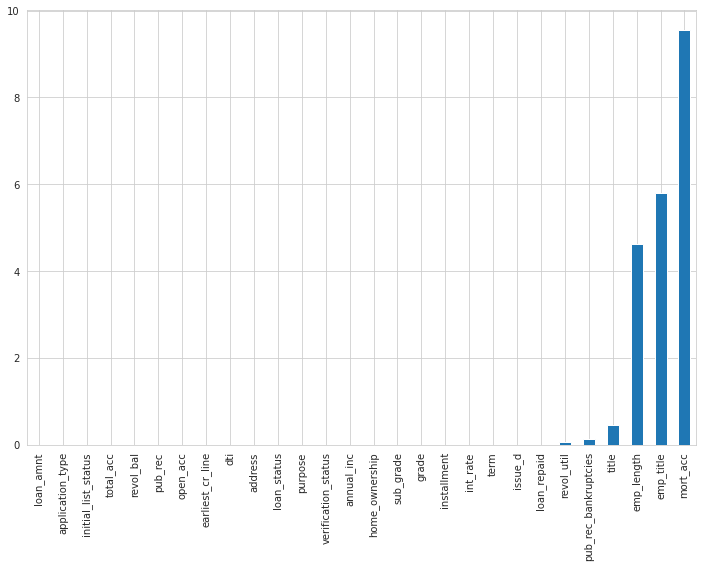

In [0]:
plt.figure(figsize=(12,8))
((df.isnull().sum()/len(df))*100).sort_values().plot(kind='bar')

_Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook._

In [0]:
 feat_info('emp_title') 

The job title supplied by the Borrower when applying for the loan.*


In [0]:
 feat_info('emp_length') 

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


_How many unique employment job titles are there?_

In [0]:
df['emp_title'].nunique()

173105

In [0]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [0]:
df['emp_title'].value_counts()

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
Visiting Nurse Health System          1
Coral Graphics                        1
Bloemhof Ag. Enterprises              1
COO/CFO                               1
National Account Representative       1
Name: emp_title, Length: 173105, dtype: int64

_Realistically there are too many unique job titles to 
try to convert this to a dummy variable feature. Let's remove that emp_title column._

In [0]:
df.drop('emp_title', axis=1, inplace=True)

_Create a count plot of the emp_length feature column. Challenge: Sort the order of the values._

In [0]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

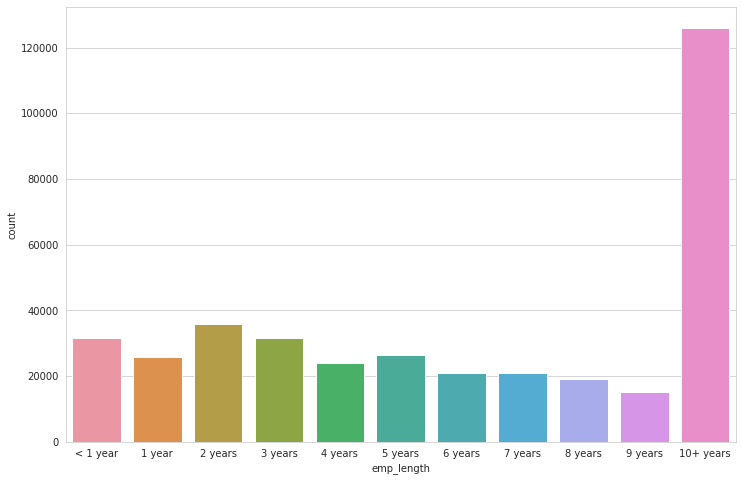

In [0]:
# I will copy the result from SORTED and manage the '< ' symbol

plt.figure(figsize=(12,8))

emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

sns.countplot(df['emp_length'], order= emp_length_order)

_Plot out the countplot with a hue separating Fully Paid vs Charged Off_

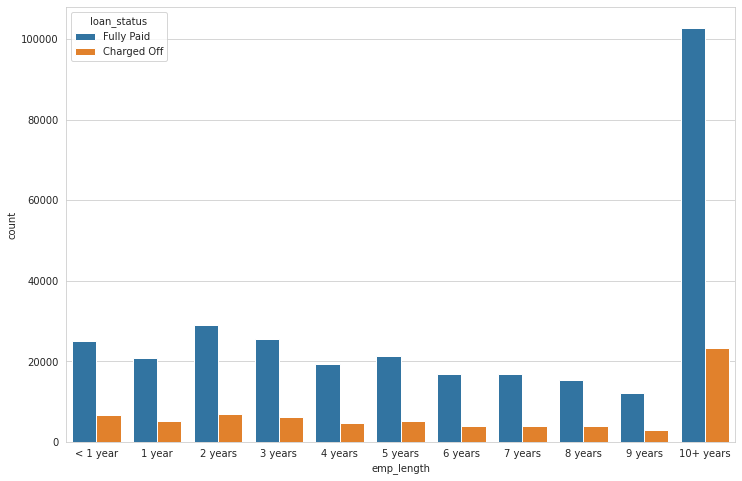

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(df['emp_length'], order= emp_length_order, hue=df['loan_status'])

_CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off._
* what we want is the percentage of charge offs per category. 

* Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.

In [0]:
emp_co= df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_co.head()

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
Name: loan_status, dtype: int64

In [0]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby(df['emp_length'].dropna()).count()['loan_status']
emp_fp.head()

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
Name: loan_status, dtype: int64

_Calculating the ratio Charged_Off versus Fully_Paid_

In [0]:
emp_ratio_1 = emp_co/emp_fp
emp_ratio_1

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

_The actual percent for category would be:_

In [0]:
emp_ratio_2 = emp_co/(emp_co + emp_fp)
emp_ratio_2

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

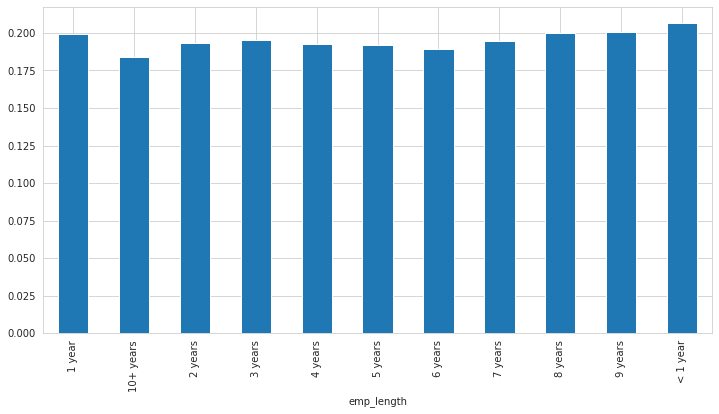

In [0]:
plt.figure(figsize=(12,6))
emp_ratio_2.plot(kind='bar')

_more or less all categories have the same percentage (around 20% people from any category will not paid the loan_

* people working for more than 10 years have a slightly smaller charge off rate than people working less time(one or less than one year)

_The difference is extremely similar accross all employments. We can drop this feature_

_Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column._

In [0]:
df = df.drop('emp_length', axis=1)

_Revisit the DataFrame to see what feature columns still have missing data._

In [0]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

_Review the title column and the purpose column. Both contain the same information?_

In [0]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [0]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

_The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column._

In [0]:
df.drop('title', axis=1, inplace=True)

_Lets check again what are the other features that have nulls_

In [0]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**
---
_Find out what the mort_acc feature represents_

In [0]:
feat_info('mort_acc')

Number of mortgage accounts.


_Create a value_counts of the mort_acc column._

In [0]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

_There are many ways we could deal with this missing data._
* attempt to build a simple model to fill it in, such as a linear model:
* just fill it in based on the mean of the other columns, or
* bin the columns into categories and then set NaN as its own category. 

_There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc_

In [0]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

_Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate their mean value. Then select just the mort_acc. To get the result below:_

In [0]:
print("Mean of mort_acc column per total_acc")
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg.head(10)

Mean of mort_acc column per total_acc


total_acc
2.0     0.000000
3.0     0.052023
4.0     0.066743
5.0     0.103289
6.0     0.151293
7.0     0.221695
8.0     0.308422
9.0     0.365499
10.0    0.429158
11.0    0.526570
Name: mort_acc, dtype: float64

In [0]:
total_acc_avg[9.0]

0.36549925484351714

_Let's fill in the missing mort_acc values based on their total_acc value._

* If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.
* This involves using an .apply() method with two columns. Check out the link below for more info.

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [0]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [0]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1 )

In [0]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

_revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna()._

In [0]:
df = df.dropna() # !!! if I use df.dropna(axis=1)--> il will drop te columns

In [0]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [0]:
df.shape

(395219, 25)

## Categorical Variables and Dummy Variables
_We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns._

_List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)_

_[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)_

In [0]:
# df.select_dtypes('object').head(2)
list(df.select_dtypes(['object']).columns)

# df.infer_objects().dtypes # ---> returns all the columns not just the 'object' ones
# df.select_dtypes(include='bool')
# df.select_dtypes(exclude=['int'])
# df.select_dtypes(include=['float64'])


['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [0]:
# mylist = list(df.select_dtypes(include=['bool']).columns)
# mylist

---
_Let's now go through all the string features to see what we should do with them._
---
### term feature

_Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map()._

In [0]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [0]:
df['term'].head(5)

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [0]:
df['term'] = df['term'].apply(lambda x: int(x.split(' ')[1]))
# I convert to int the column df['term']
# or df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [0]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


In [0]:
list(df.select_dtypes(['object']).columns)

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### grade feature
_We already know grade is part of sub_grade, so just drop the grade feature._

In [0]:
df = df.drop('grade', axis=1)

_Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call._

In [0]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
subgrade_dummies.head(2)

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df = pd.concat([df.drop('sub_grade',axis=1), subgrade_dummies], axis=1)

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [0]:
list(df.select_dtypes(['object']).columns)

['home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

### verification_status, 
### application_type,
### initial_list_status,
### purpose 

In [0]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [0]:
df['application_type'].value_counts()


INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [0]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [0]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

_Convert these columns into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns._

In [0]:
verif_dum = pd.get_dummies(df['verification_status'], drop_first=True)
appli_dum = pd.get_dummies(df['application_type'], drop_first=True)
initi_dum = pd.get_dummies(df['initial_list_status'], drop_first=True)
purpo_dum = pd.get_dummies(df['purpose'], drop_first=True)

In [0]:
df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1), verif_dum, appli_dum,initi_dum, purpo_dum ], axis=1)

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [0]:
list(df.select_dtypes(['object']).columns)

['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line', 'address']

### home_ownership
_Review the value_counts for the home_ownership column._

In [0]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

_Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns._

In [0]:
#df[df['home_ownership']=='NONE']['home_ownership'].head(2)

In [0]:
df['home_ownership']= df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [0]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [0]:
howner_dum = pd.get_dummies(df['home_ownership'], drop_first=True )

In [0]:
df = pd.concat([df.drop('home_ownership',axis=1), howner_dum], axis=1)

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [0]:
list(df.select_dtypes(['object']).columns)

['issue_d', 'loan_status', 'earliest_cr_line', 'address']

### address
_Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column._

In [0]:
df['address'].head(2)

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
Name: address, dtype: object

In [0]:
df['zip_code'] = df['address'].apply(lambda x: x.split(' ')[-1])

In [0]:
df['zip_code'].head(2)

0    22690
1    05113
Name: zip_code, dtype: object

In [0]:
df.isnull().sum()

loan_amnt      0
term           0
int_rate       0
installment    0
annual_inc     0
              ..
wedding        0
OTHER          0
OWN            0
RENT           0
zip_code       0
Length: 74, dtype: int64

_Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column._

In [0]:
zip_dum = pd.get_dummies(df['zip_code'], drop_first=True)
df = pd.concat([df.drop(['zip_code', 'address'], axis=1),zip_dum], axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700'],
      dtype='object')

_df['w'] and df['f'] belong to initial feature called 'initial status'_

In [0]:
# df.drop('zip_code', axis=1, inplace=True)

In [0]:
#df.columns

In [0]:
# df.drop('address', axis=1, inplace=True)

In [0]:
list(df.select_dtypes(['object']).columns)

['issue_d', 'loan_status', 'earliest_cr_line']

### issue_d 

_This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature._

In [0]:
feat_info('issue_d')

The month which the loan was funded


In [0]:
df = df.drop('issue_d', axis=1)

In [0]:
list(df.select_dtypes(['object']).columns)

['loan_status', 'earliest_cr_line']

### earliest_cr_line
_This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature._

In [0]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [0]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
May-1955       1
Aug-1959       1
Dec-1956       1
Dec-1959       1
May-1962       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [0]:
df['earliest_c_year'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))
# or df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [0]:
df['earliest_c_year'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_c_year, Length: 65, dtype: int64

In [0]:
df = df.drop(['earliest_cr_line'], axis=1)

In [0]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'OTHER', 'OWN', 'RENT',
       '05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630',
       '93700', 'earliest_c_year'],
      dtype='object')

In [0]:
list(df.select_dtypes(['object']).columns)

['loan_status']

In [0]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,Source Verified,Verified,INDIVIDUAL,JOINT,w,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_c_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1999


In [0]:
df.shape #(395219, 80)

(395219, 80)

_Drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s._

In [0]:
df = df.drop('loan_status', axis=1)

## Train Test Split

_Import train_test_split from sklearn._

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
compression_opts = dict(method='zip', archive_name='out.csv')
df.to_csv('/content/drive/My Drive/Colab Notebooks/DeepLearning_TensorFlow/TensorFlow_FILES/DATA/lendingClub.csv', index=False, compression=compression_opts)

_Set X and y variables to the .values of the features and label.
!!! to save memory sometimes it could be convenient to use just a sample of data. Skip the following lines and see further below_ 

In [0]:
X = df.drop('loan_repaid', axis=1).values

In [0]:
y = df['loan_repaid'].values

In [0]:
X.shape

(395219, 78)

In [0]:
y.shape

(395219,)

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [0]:
# print(len(df))

395219


In [0]:
# df = df.sample(frac=0.1,random_state=101)

In [0]:
# print(len(df))

39522


In [0]:
# X = df.drop('loan_repaid', axis=1)
# X.shape

(39522, 78)

In [0]:
# y = df['loan_repaid']
# y.shape

(39522,)

_Perform a train/test split with test_size=0.2 and a random_state of 101._

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) 

## Normalizing the Data

_Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data._

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
X_train

array([[0.22307692, 0.        , 0.46552396, ..., 0.        , 0.        ,
        0.89855072],
       [0.48717949, 0.        , 0.32450331, ..., 0.        , 0.        ,
        0.85507246],
       [0.31666667, 1.        , 0.46552396, ..., 0.        , 0.        ,
        0.85507246],
       ...,
       [0.19358974, 0.        , 0.16945851, ..., 0.        , 0.        ,
        0.8115942 ],
       [0.28205128, 1.        , 0.4253993 , ..., 0.        , 0.        ,
        0.79710145],
       [0.87179487, 0.        , 0.57148422, ..., 0.        , 0.        ,
        0.76811594]])

In [0]:
X_test

array([[0.35384615, 0.        , 0.51305025, ..., 0.        , 0.        ,
        0.69565217],
       [0.76923077, 1.        , 0.47721075, ..., 0.        , 0.        ,
        0.75362319],
       [0.53846154, 1.        , 0.10011687, ..., 0.        , 0.        ,
        0.85507246],
       ...,
       [0.1025641 , 0.        , 0.2384106 , ..., 0.        , 0.        ,
        0.92753623],
       [0.48974359, 1.        , 0.74678613, ..., 0.        , 0.        ,
        0.79710145],
       [0.34358974, 1.        , 0.16945851, ..., 1.        , 0.        ,
        0.84057971]])

# Creating the Model

_Import the necessary Keras functions._

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

_Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)_

In [0]:
model_full = Sequential()

# input layer
model_full.add(Dense(78, activation='relu'))
model_full.add(Dropout(0.35))

# hidden layer
model_full.add(Dense(39, activation='relu'))
model_full.add(Dropout(0.36))

# hidden layer
model_full.add(Dense(19, activation='relu'))
model_full.add(Dropout(0.25))

# output layer
model_full.add(Dense(1, activation='sigmoid'))

# compile model
model_full.compile(optimizer='adam',
              loss='binary_crossentropy')

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

_Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256._

In [0]:
model_full.fit(X_train, 
          y_train, 
          batch_size=256, 
          epochs=25, 
          verbose=1,
          callbacks=[early_stop],
          validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3144 - val_loss: 0.2654
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2685 - val_loss: 0.2633
Epoch 3/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2649 - val_loss: 0.2626
Epoch 4/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2633 - val_loss: 0.2628
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2622 - val_loss: 0.2624
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2615 - val_loss: 0.2626
Epoch 7/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2612 - val_loss: 0.2626
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2609 - val_loss: 0.2624
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2607 - val_loss: 0.2626
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.260

# Section 3: Evaluating Model Performance.

_Plot out the validation loss versus the training loss._

In [0]:
losses = pd.DataFrame(model_full.history.history)

In [0]:
losses.head()

,loss,val_loss
0,0.314431,0.265376
1,0.268476,0.263327
2,0.264894,0.262577
3,0.263328,0.262827
4,0.262219,0.262392


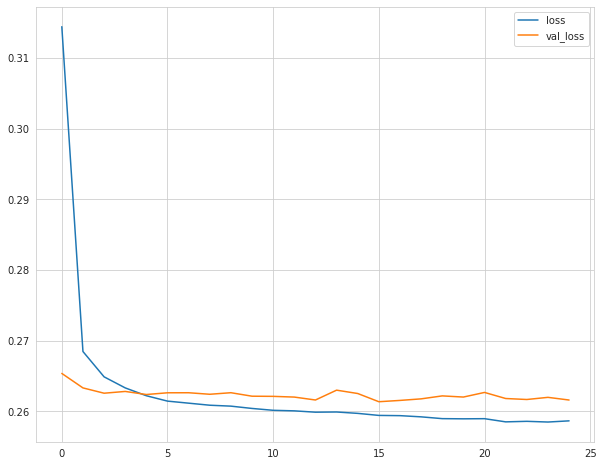

In [0]:
# plt.figure(figsize=(10,8))
losses[['loss','val_loss']].plot(figsize=(10,8))

_Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set_

In [0]:
# pred = model.predict_classes(X_test) .. soon deprecated
pred = (model_full.predict(X_test) > 0.5).astype("int32")

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6730  8928]
 [    8 63378]]


_Given the customer below, would you offer this person a loan_

In [0]:
len(df)

395219

In [0]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt          25000.00
term                  60.00
int_rate              18.24
installment          638.11
annual_inc         61665.00
                     ...   
48052                  0.00
70466                  0.00
86630                  0.00
93700                  0.00
earliest_c_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [0]:
new_customer.shape

(78,)

In [0]:
new_customer.values.reshape(1,78)

array([[2.5000e+04, 6.0000e+01, 1.8240e+01, 6.3811e+02, 6.1665e+04,
        3.0110e+01, 1.6000e+01, 0.0000e+00, 2.7778e+04, 6.5500e+01,
        4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

In [0]:
(model_full.predict(new_customer.values.reshape(1,78)) > 0.5).astype("int32")

array([[1]], dtype=int32)

_we conlcude that this customer could repaid the loan_

_Now check, did this person actually end up paying back their loan?_

In [0]:
df['loan_repaid'].iloc[random_ind]

1

_Yes!! The random customer repaid the loan_

_Save your model._

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model_full.save('/content/drive/My Drive/Colab Notebooks/DeepLearning_TensorFlow/TensorFlow_FILES/ANNs/lendingClub_fulldata_model.h5')

_Lets try to use the entire dataset and not the sample data_